For different z's, plot how avgvel shifts as epochs increase.

In [22]:
import numpy as np
import glob
import csv
import os

sample_z_cnt = 9 # [0.1, 0.5, 0.9]; or 5 if use [0.1, 0.3, 0.5, 0.7, 0.9]
# use [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
this_run_info = f'0523_0101_take2'
total_eps = 60
avgvel_dir = f'test/all_avgvel_ade_fde/{this_run_info}'
start_eps = 20
stepsize = 8

ade_all = np.zeros((sample_z_cnt, total_eps//2))
fde_all = np.zeros((sample_z_cnt, total_eps//2))
avgvel_all = np.zeros((sample_z_cnt, total_eps//2))

In [23]:
for i in range(start_eps, total_eps+1, stepsize):
    cp_num = str(i)
    this_csv_file = f'{avgvel_dir}/{cp_num}.csv'
    all_this_epoch = np.genfromtxt(this_csv_file, delimiter=',')
    ade_all[:, i//2-1] = all_this_epoch[:,0]
    fde_all[:, i//2-1] = all_this_epoch[:,1]
    avgvel_all[:, i//2-1] = all_this_epoch[:,2]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

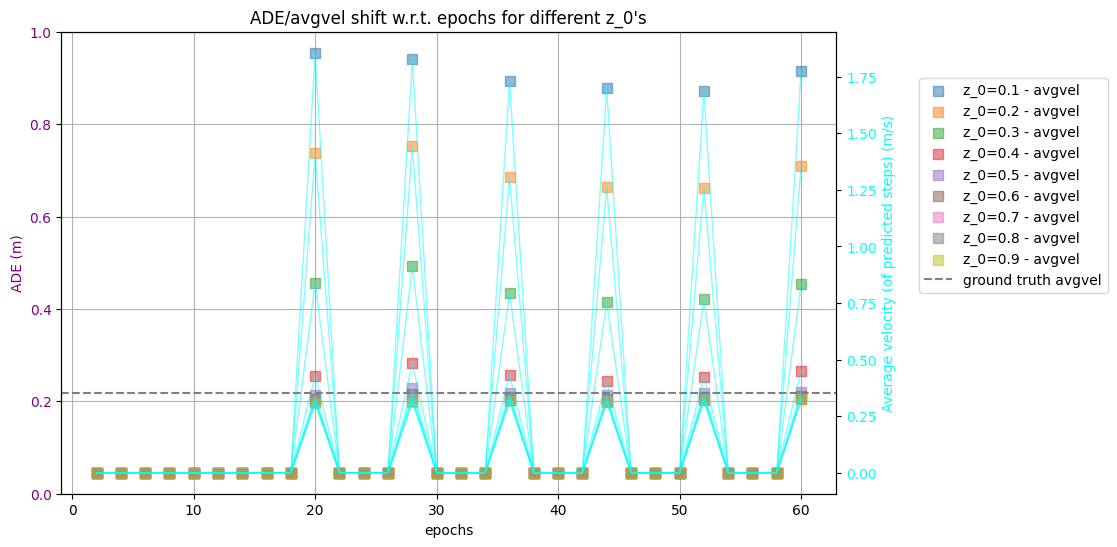

In [24]:
import matplotlib.pyplot as plt

x = np.arange(2, total_eps+1, 2)

fig, ax1 = plt.subplots(figsize=(10,6))

colors = plt.cm.tab10(range(sample_z_cnt))

# for i in range(sample_z_cnt):
#     z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
#     ax1.scatter(x, ade_all[i,:],s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - FDE')
#     ax1.plot(x, ade_all[i,:],color='red',alpha=0.5, linestyle='-', linewidth=1)

#################################################################################33

ax1.set_xlabel('epochs')
ax1.set_ylabel('ADE (m)', color='purple')
ax1.tick_params(axis='y',labelcolor='purple')
ax1.grid(True)

ax2 = ax1.twinx()

for i in range(sample_z_cnt):
    
    z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
    ax2.scatter(x, avgvel_all[i,:],marker='s',s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - avgvel')
    ax2.plot(x, avgvel_all[i,:],color='cyan',alpha=0.5, linestyle='-', linewidth=1)

ax2.set_ylabel('Average velocity (of predicted steps) (m/s)', color='cyan')
ax2.tick_params(axis='y',labelcolor='cyan')

ax2.axhline(y=0.3525, color='grey', linestyle='--', label='ground truth avgvel')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, bbox_to_anchor=(1.35,0.9), borderaxespad=0.)

plt.title("ADE/avgvel shift w.r.t. epochs for different z_0's")
plt.show()